<a href="https://colab.research.google.com/github/FareedPatel420/Cyclist-Alert-System/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Vehicle Detection

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
%pip install torch pillow


Ultralytics YOLOv8.0.212 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


100%|██████████| 6.23M/6.23M [00:00<00:00, 246MB/s]



0: 224x640 2 cars, 189.1ms
Speed: 18.2ms preprocess, 189.1ms inference, 39.1ms postprocess per image at shape (1, 3, 224, 640)


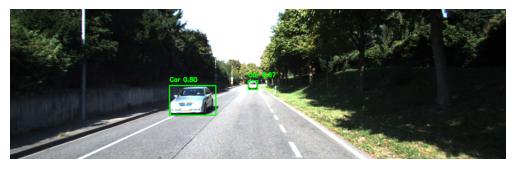

In [3]:
import torch
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Assuming you have a YOLO class or function to load the model
model = YOLO("yolov8n.pt")

# Load the image
img = Image.open('/content/gdrive/MyDrive/images/001567.png')

# Perform inference
results = model(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# Convert the PIL image to a NumPy array for visualization
img_np = np.array(img)

# Filter out boxes and confidences for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()
confidences = bounding_boxes.conf[mask].cpu().numpy()

# Draw the bounding boxes on the image
for i, box in enumerate(boxes_xyxy):
    color = (0, 255, 0)  # green
    cv2.rectangle(img_np, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), color, 2)
    cv2.putText(img_np, f"Car {confidences[i]:.2f}", (int(box[0]), int(box[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image with bounding boxes
plt.imshow(img_np)
plt.axis('off')
plt.show()


#Depth Estimation

In [4]:
%cd /content/gdrive/MyDrive/AdaBins

/content/gdrive/MyDrive/AdaBins


In [ ]:
!git clone 'https://github.com/shariqfarooq123/AdaBins'

In [ ]:
%cd AdaBins

In [ ]:
"""
Download pretrained models
"""

!gdown https://drive.google.com/uc?id=1lvyZZbC9NLcS8a__YPcUP7rDiIpbRpoF
!gdown https://drive.google.com/uc?id=1HMgff-FV6qw1L0ywQZJ7ECa9VPq1bIoj
!mkdir pretrained
!mv AdaBins_nyu.pt pretrained/AdaBins_nyu.pt
!mv AdaBins_kitti.pt pretrained/AdaBins_kitti.pt

In [5]:
%cd /content/gdrive/MyDrive/AdaBins
from infer import InferenceHelper
from PIL import Image
import matplotlib.pyplot as plt

/content/gdrive/MyDrive/AdaBins


Loading base model ()...

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b5_ap-9e82fae8.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b5_ap-9e82fae8.pth


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.


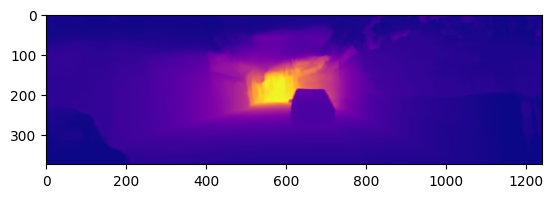

In [ ]:
from infer import InferenceHelper
from PIL import Image
import matplotlib.pyplot as plt

infer_helper = InferenceHelper(dataset='kitti')

# predict depth of a single pillow image
img = Image.open("/content/gdrive/MyDrive/images/000003.png")  # any rgb pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()


0: 224x640 2 cars, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)


Loading base model ()...

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b5_ap-9e82fae8.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b5_ap-9e82fae8.pth


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.


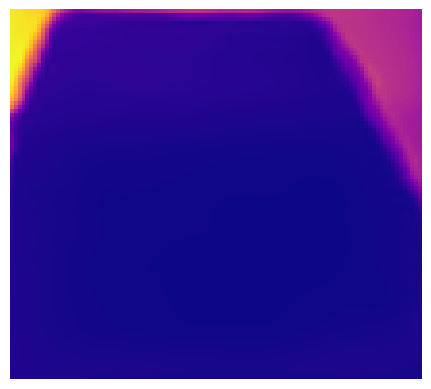

In [ ]:
import torch
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from infer import InferenceHelper

# YOLO
# Assuming you have a YOLO class or function to load the model
model = YOLO("yolov8n.pt")

# Load the image
img = Image.open('/content/gdrive/MyDrive/images/000003.png')

# Perform inference
results = model(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# Convert the PIL image to a NumPy array for visualization
img_np = np.array(img)

# Filter out boxes and confidences for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()
confidences = bounding_boxes.conf[mask].cpu().numpy()

# AdaBins
infer_helper = InferenceHelper(dataset='kitti')

# predict depth of a single pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)
predicted_depth_np = predicted_depth[0][0]

# Crop the bounding boxes from the depth map
cropped_depths = []
for box in boxes_xyxy:
    cropped_depth = predicted_depth_np[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    cropped_depths.append(cropped_depth)

# Display the cropped depth maps
for depth in cropped_depths:
    plt.imshow(depth, cmap='plasma')
    plt.axis('off')
    plt.show()

#@Random Forest

In [ ]:
import pandas as pd

# Corrected code to load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/augmented_kitti_cars.csv"
df = pd.read_csv(csv_file_path, delimiter=";") # Replace with the path to your CSV file

# Calculate the correlation between all attributes and the "distance" column
correlation = df.corr()["Distance"]

# Show the correlation values
print(correlation)


BBox_left        0.118330
BBox_top        -0.232289
BBox_right      -0.102190
BBox_bottom     -0.789772
Distance         1.000000
Width           -0.758065
Height          -0.806990
Diagonal        -0.798725
Aspect_Ratio    -0.060535
Box_Area        -0.672281
Box_Perimeter   -0.805504
Centroid_x       0.008202
Centroid_y      -0.732030
Name: Distance, dtype: float64


<ipython-input-11-0cd895195c66>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()["Distance"]


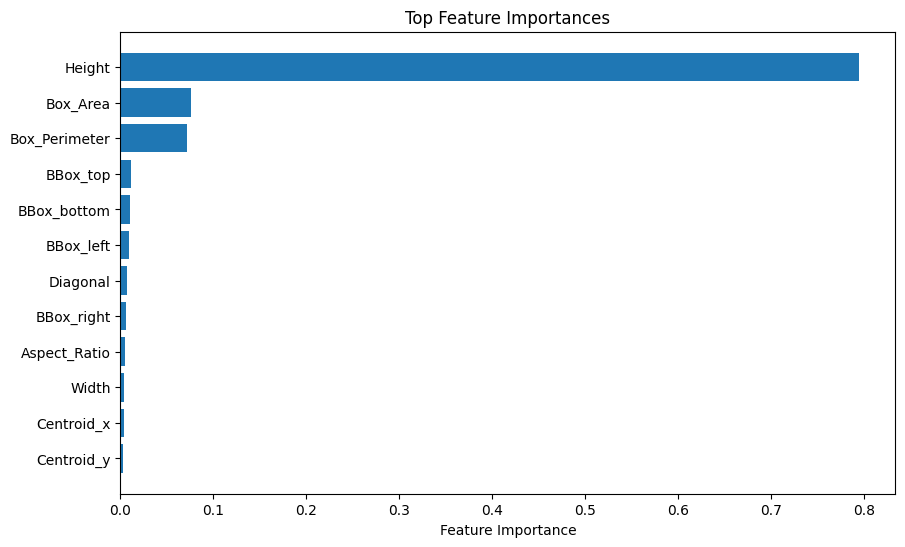

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Define input features (X) and target variable (y)
X = df.drop("Distance", axis=1).select_dtypes(include=['float64'])  # Input features (all float columns except "Distance")
y = df["Distance"]  # Target variable ("Distance")
# Split the data into training and testing sets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the hyperparameters as needed
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for selecting the top N important features
top_n = 15  # Adjust the number of top features you want to keep

# Select the top N features
selected_features = importance_df['Feature'].head(top_n).values

# Create a new DataFrame with the selected features
X_selected = X[selected_features]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


#@Random Forest Training with Augmented Data

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/augmented_kitti_cars.csv"
df = pd.read_csv(csv_file_path, delimiter=";")

# Define input features (X) and target variable (y)
X = df[['BBox_left', 'BBox_top', 'BBox_right', 'BBox_bottom', 'Width', 'Height', 'Diagonal', 'Aspect_Ratio', 'Box_Area', 'Box_Perimeter', 'Centroid_x','Centroid_y' ]]
y = df["Distance"]  # Target variable ("distance")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate the Root Mean Squared Error (RMSE)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Calculate R-squared (R²)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.2f}")

# Save the trained model
model_save_path = "random_forest_model_12features.pkl"
joblib.dump(rf_model, model_save_path)
print(f"Model saved to {model_save_path}")


Random Forest - Mean Absolute Error (MAE): 1.52
Random Forest - Mean Squared Error (MSE): 5.58
Random Forest - Root Mean Squared Error (RMSE): 2.36
Random Forest - R-squared (R²): 0.98
Model saved to random_forest_model_12features.pkl


#@Random Forest(12 features) Testing


In [ ]:
import torch
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestRegressor

# Load the trained Random Forest model
model_path = "/content/gdrive/MyDrive/AdaBins/random_forest_model_12features.pkl"
rf_model = joblib.load(model_path)

# YOLO
# Assuming you have a YOLO class or function to load the model
model_yolo = YOLO("yolov8n.pt")

# Load the provided image
img_path = '/content/gdrive/MyDrive/images/001567.png'
img = Image.open(img_path)

# Perform YOLO inference
results = model_yolo(img)
bounding_boxes = results[0].boxes

# Filter out boxes for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

# Extract features for Random Forest from bounding boxes
features_list = []
for box in boxes_xyxy:
    BBox_left = box[0]
    BBox_top = box[1]
    BBox_right = box[2]
    BBox_bottom = box[3]
    BBox_Width = BBox_right - BBox_left
    BBox_Height = BBox_bottom - BBox_top
    Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
    Aspect_Ratio = BBox_Width / BBox_Height
    Box_Area = BBox_Width * BBox_Height
    Box_Perimeter = 2 * (BBox_Width + BBox_Height)
    Centroid_x = (BBox_left + BBox_right) / 2
    Centroid_y = (BBox_top + BBox_bottom) / 2

    features = [BBox_left, BBox_top, BBox_right, BBox_bottom, BBox_Width, BBox_Height, Diagonal, Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y]
    features_list.append(features)

# Use Random Forest model to predict the distance for each bounding box
predicted_distances = rf_model.predict(features_list)

print("Predicted distances for bounding boxes:", predicted_distances)



0: 224x640 2 cars, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)


Predicted distances for bounding boxes: [     19.727      52.604]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#@Depth and Bouding Box Random Forest

In [ ]:
import pandas as pd

# Corrected code to load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/updated_output_with_features.csv"
df = pd.read_csv(csv_file_path, delimiter=";") # Replace with the path to your CSV file

# Calculate the correlation between all attributes and the "distance" column
correlation = df.corr()["Distance"]

# Show the correlation values
print(correlation)


BBox_left           0.145413
BBox_top           -0.207892
BBox_right         -0.099815
BBox_bottom        -0.804850
Distance            1.000000
Average Depth       0.935660
Depth Variance     -0.752953
Depth Median        0.838592
Depth Mode         -0.039055
Depth Range        -0.721466
Depth Percentile   -0.588039
Width              -0.736849
Height             -0.805780
Diagonal           -0.779330
Aspect_Ratio       -0.028227
Box_Area           -0.648790
Box_Perimeter      -0.787161
Centroid_x          0.023439
Centroid_y         -0.770769
Name: Distance, dtype: float64


<ipython-input-28-99edfc223898>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()["Distance"]


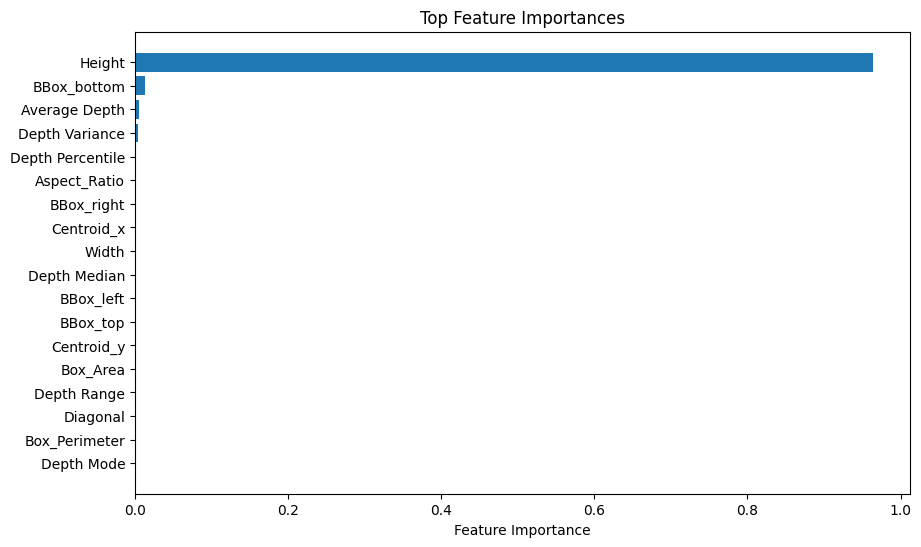

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Define input features (X) and target variable (y)
X = df.drop("Distance", axis=1).select_dtypes(include=['float64'])  # Input features (all float columns except "Distance")
y = df["Distance"]  # Target variable ("Distance")
# Split the data into training and testing sets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the hyperparameters as needed
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for selecting the top N important features
top_n = 100  # Adjust the number of top features you want to keep

# Select the top N features
selected_features = importance_df['Feature'].head(top_n).values

# Create a new DataFrame with the selected features
X_selected = X[selected_features]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


In [6]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/updated_output_with_features.csv"
df = pd.read_csv(csv_file_path, delimiter=";")

# Define input features (X) and target variable (y)
X = df[['BBox_left', 'BBox_top', 'BBox_right', 'BBox_bottom', 'Average Depth', 'Depth Variance', 'Depth Median', 'Depth Mode', 'Depth Range', 'Depth Percentile', 'Width','Height','Diagonal', 'Aspect_Ratio', 'Box_Area', 'Box_Perimeter', 'Centroid_x', 'Centroid_y' ]]
y = df["Distance"]  # Target variable ("distance")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest model with the best hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=931,
    max_depth=60,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=5,
    bootstrap=False,
    random_state=42  # To ensure reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate the Root Mean Squared Error (RMSE)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Calculate R-squared (R²)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.2f}")

# Save the trained model
model_save_path = "random_forest_model_20featuresHyper parameters12.pkl"
joblib.dump(rf_model, model_save_path)
print(f"Model saved to {model_save_path}")


Random Forest - Mean Absolute Error (MAE): 1.06
Random Forest - Mean Squared Error (MSE): 2.62
Random Forest - Root Mean Squared Error (RMSE): 1.62
Random Forest - R-squared (R²): 0.99
Model saved to random_forest_model_20featuresHyper parameters12.pkl


In [ ]:
import torch
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestRegressor

# Load the trained Random Forest model
model_path = "/content/gdrive/MyDrive/AdaBins/random_forest_model_20features.pkl"
rf_model = joblib.load(model_path)

# YOLO
# Assuming you have a YOLO class or function to load the model
model_yolo = YOLO("yolov8n.pt")

# Load the provided image
img_path = '/content/gdrive/MyDrive/images/001567.png'
img = Image.open(img_path)

# Perform YOLO inference
results = model_yolo(img)
bounding_boxes = results[0].boxes

# Filter out boxes for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

# Placeholder function to get depth-related features from a bounding box in an image.
# This needs actual implementation based on your use case.
def get_depth_features(bbox, img):
    # Placeholder implementation
    average_depth = np.random.random()  # Random number as placeholder
    depth_variance = np.random.random()
    depth_median = np.random.random()
    depth_mode = np.random.random()
    depth_range = np.random.random()
    depth_percentile = np.random.random()
    return average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile

features_list = []
for box in boxes_xyxy:
    BBox_left = box[0]
    BBox_top = box[1]
    BBox_right = box[2]
    BBox_bottom = box[3]
    BBox_Width = BBox_right - BBox_left
    BBox_Height = BBox_bottom - BBox_top
    Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
    Aspect_Ratio = BBox_Width / BBox_Height
    Box_Area = BBox_Width * BBox_Height
    Box_Perimeter = 2 * (BBox_Width + BBox_Height)
    Centroid_x = (BBox_left + BBox_right) / 2
    Centroid_y = (BBox_top + BBox_bottom) / 2



    # Get depth-related features
    average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile = get_depth_features(box, img)

    features = [BBox_left, BBox_top, BBox_right, BBox_bottom, average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile, BBox_Width, BBox_Height, Diagonal, Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y]
    features_list.append(features)

# Use Random Forest model to predict the distance for each bounding box
predicted_distances = rf_model.predict(features_list)

print("Predicted distances for bounding boxes:", predicted_distances)



0: 224x640 2 cars, 20.7ms
Speed: 1.9ms preprocess, 20.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)


Predicted distances for bounding boxes: [     16.403      50.773]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#@Random Forest with Depth and Bouding Box Feature Testing

In [ ]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import joblib
from infer import InferenceHelper
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a YOLO class or function to load the model
model_yolo = YOLO("yolov8n.pt")

# Load the image
img_path = '/content/gdrive/MyDrive/images/000003.png'
img = Image.open(img_path)

# Perform YOLO inference
results = model_yolo(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# AdaBins
infer_helper = InferenceHelper(dataset='kitti')

# Predict depth of a single pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)
predicted_depth_np = predicted_depth[0][0]

def get_depth_features(depth_crop):
    # Be cautious with the depth values, if they are not integers, you may need a different approach to find the mode
    average_depth = np.mean(depth_crop)
    depth_variance = np.var(depth_crop)
    depth_median = np.median(depth_crop)
    depth_mode = np.bincount(depth_crop.astype(int).flatten()).argmax() if depth_crop.size else 0
    depth_range = np.ptp(depth_crop)
    depth_percentile_diff = np.percentile(depth_crop, 75) - np.percentile(depth_crop, 25)

    return average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff

# Load the trained Random Forest model
model_path = "/content/gdrive/MyDrive/AdaBins/xgboost_model_20features.pkl"
rf_model = joblib.load(model_path)

# Filter out boxes for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

features_list = []
for box in boxes_xyxy:
    cropped_depth = predicted_depth_np[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff = get_depth_features(cropped_depth)

    BBox_left, BBox_top, BBox_right, BBox_bottom = box
    BBox_Width = BBox_right - BBox_left
    BBox_Height = BBox_bottom - BBox_top
    Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
    Aspect_Ratio = BBox_Width / BBox_Height
    Box_Area = BBox_Width * BBox_Height
    Box_Perimeter = 2 * (BBox_Width + BBox_Height)
    Centroid_x = (BBox_left + BBox_right) / 2
    Centroid_y = (BBox_top + BBox_bottom) / 2

    features = [
        BBox_left, BBox_top, BBox_right, BBox_bottom, average_depth,
        depth_variance, depth_median, depth_mode, depth_range,
        depth_percentile_diff, BBox_Width, BBox_Height, Diagonal,
        Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y
    ]
    features_list.append(features)

# Use the Random Forest model to predict the distance for each bounding box
predicted_distances = rf_model.predict(np.array(features_list))

print("Predicted distances for bounding boxes:", predicted_distances)



0: 224x640 2 cars, 24.1ms
Speed: 1.9ms preprocess, 24.1ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)


Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.
Predicted distances for bounding boxes: [     12.273]


#@Depth and BB XGBoost without Hypertuning


In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/updated_output_with_features.csv"
df = pd.read_csv(csv_file_path, delimiter=";")

# Define input features (X) and target variable (y)
X = df[['BBox_left', 'BBox_top', 'BBox_right', 'BBox_bottom', 'Average Depth', 'Depth Variance', 'Depth Median', 'Depth Mode', 'Depth Range', 'Depth Percentile', 'Width','Height','Diagonal', 'Aspect_Ratio', 'Box_Area', 'Box_Perimeter', 'Centroid_x', 'Centroid_y' ]]
y = df["Distance"]  # Target variable ("distance")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Calculate the Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate the Root Mean Squared Error (RMSE)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

# Calculate R-squared (R²)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"XGBoost - Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"XGBoost - R-squared (R²): {r2_xgb:.2f}")

# Save the trained model
model_save_path = "xgboost_model_20features.pkl"
joblib.dump(xgb_model, model_save_path)
print(f"Model saved to {model_save_path}")


XGBoost - Mean Absolute Error (MAE): 1.11
XGBoost - Mean Squared Error (MSE): 2.73
XGBoost - Root Mean Squared Error (RMSE): 1.65
XGBoost - R-squared (R²): 0.99
Model saved to xgboost_model_20features.pkl


#@Random Forest with Hyper Parameters

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/updated_output_with_features.csv"
df = pd.read_csv(csv_file_path, delimiter=";")

# Define input features (X) and target variable (y)
X = df[['BBox_left', 'BBox_top', 'BBox_right', 'BBox_bottom', 'Average Depth', 'Depth Variance', 'Depth Median', 'Depth Mode', 'Depth Range', 'Depth Percentile', 'Width','Height','Diagonal', 'Aspect_Ratio', 'Box_Area', 'Box_Perimeter', 'Centroid_x', 'Centroid_y']]
y = df["Distance"]  # Target variable ("Distance")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model with the tuned hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=931,       # Number of trees in the forest
    max_depth=60,           # Maximum depth of the trees
    max_features='sqrt',    # Number of features to consider when looking for the best split
    min_samples_leaf=3,     # Minimum number of samples required at each leaf node
    min_samples_split=5,    # Minimum number of samples required to split an internal node
    bootstrap=False,        # Whether bootstrap samples are used when building trees
    random_state=42         # Ensures a deterministic outcome for reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate the Root Mean Squared Error (RMSE)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Calculate R-squared (R²)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.2f}")

# Save the trained model
model_save_path = "random_forest_model_HyperTuned20features.pkl"
joblib.dump(rf_model, model_save_path)
print(f"Model saved to {model_save_path}")


Random Forest - Mean Absolute Error (MAE): 1.06
Random Forest - Mean Squared Error (MSE): 2.62
Random Forest - Root Mean Squared Error (RMSE): 1.62
Random Forest - R-squared (R²): 0.99
Model saved to random_forest_model_HyperTuned20features.pkl


#@Angle Estimation Trial


0: 224x640 2 cars, 20.8ms
Speed: 2.0ms preprocess, 20.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)


Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Angle for object: 30.89 degrees
Predicted distances for bounding boxes: 20.2342


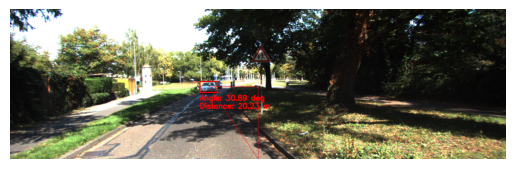

In [ ]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import joblib
from infer import InferenceHelper
from sklearn.ensemble import RandomForestRegressor
import math
import cv2  # Make sure you have OpenCV installed to use cv2

# Helper function to get depth features
def get_depth_features(depth_crop):
    average_depth = np.mean(depth_crop)
    depth_variance = np.var(depth_crop)
    depth_median = np.median(depth_crop)
    depth_mode = np.bincount(depth_crop.astype(int).flatten()).argmax() if depth_crop.size else 0
    depth_range = np.ptp(depth_crop)
    depth_percentile_diff = np.percentile(depth_crop, 75) - np.percentile(depth_crop, 25)
    return average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff



def overlay_angle(img, bbox, angle, color):
    """Overlay the calculated angle on the image."""
    x_min, y_min, x_max, y_max = bbox
    x_center = (x_min + x_max) // 2
    y_center = (y_min + y_max) // 2
    label = f"{angle:.2f} deg"
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.6
    thickness = 1
    start_x = x_center
    start_y = y_center + 30
    cv2.putText(img, label, (start_x, start_y), font, scale, color, thickness, lineType=cv2.LINE_AA)
    return img

def calculate_angle(L1_distance, L1_pixel_length, L2_pixel_length):
    # Calculate the angle theta using arctan
    theta_rad = np.arctan(L2_pixel_length / L1_pixel_length)

    # Convert from radians to degrees
    theta_deg = np.degrees(theta_rad)

    return theta_deg


def overlay_info(img_np, bbox, angle, distance, color=(255, 0, 0)):
    x_min, y_min, x_max, y_max = [int(coord) for coord in bbox]
    # Draw bounding box
    cv2.rectangle(img_np, (x_min, y_min), (x_max, y_max), color, 2)

    # Coordinates for the lines
    x_center_bbox = (x_min + x_max) // 2
    y_center_bbox = (y_min + y_max) // 2
    y_base = img_np.shape[0]  # Base of the image (ground plane)
    screen_center_x = img_np.shape[1] // 2

    # Corrected lines for angle estimation
    # L1 (from bottom center to bbox center)
    cv2.line(img_np, (screen_center_x, y_base), (x_center_bbox, y_center_bbox), color, 1)

    # L2 (horizontal line from bbox center to vertical centerline of the image)
    cv2.line(img_np, (x_center_bbox, y_center_bbox), (screen_center_x, y_center_bbox), color, 1)

    # L3 (vertical line from bottom center up to the bbox center in the y-direction)
    cv2.line(img_np, (screen_center_x, y_base), (screen_center_x, y_center_bbox), color, 1)

    # Label for angle and distance
    angle_label = f"Angle: {angle:.2f} deg"
    distance_label = f"Distance: {distance:.2f} m"

    # Overlay angle and distance
    cv2.putText(img_np, angle_label, (x_min, y_max + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    cv2.putText(img_np, distance_label, (x_min, y_max + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return img_np


# Assuming you have a YOLO class or function to load the model
model_yolo = YOLO("yolov8n.pt")

# Load the image
img_path = '/content/gdrive/MyDrive/images/000040.png'
img = Image.open(img_path)
img_np = np.array(img)  # Convert PIL image to NumPy array for visualization

# Perform YOLO inference
results = model_yolo(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# AdaBins
infer_helper = InferenceHelper(dataset='kitti')

# Predict depth of a single pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)
predicted_depth_np = predicted_depth[0][0]

# Load the trained Random Forest model
model_path = "/content/gdrive/MyDrive/AdaBins/random_forest_model_20features.pkl"
rf_model = joblib.load(model_path)

# Filter out boxes for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

# Predict distances and estimate angles for each detected car
for box in boxes_xyxy:
    # Extract the depth information for the detected car
    cropped_depth = predicted_depth_np[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff = get_depth_features(cropped_depth)

    # Extract the bounding box features
    BBox_left, BBox_top, BBox_right, BBox_bottom = box
    BBox_Width = BBox_right - BBox_left
    BBox_Height = BBox_bottom - BBox_top
    Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
    Aspect_Ratio = BBox_Width / BBox_Height
    Box_Area = BBox_Width * BBox_Height
    Box_Perimeter = 2 * (BBox_Width + BBox_Height)
    Centroid_x = (BBox_left + BBox_right) / 2
    Centroid_y = (BBox_top + BBox_bottom) / 2

    # Create a features list for the RandomForestRegressor
    features = [
        BBox_left, BBox_top, BBox_right, BBox_bottom, average_depth,
        depth_variance, depth_median, depth_mode, depth_range,
        depth_percentile_diff, BBox_Width, BBox_Height, Diagonal,
        Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y
    ]

    # Predict the distance using the RandomForestRegressor model
    predicted_distances = rf_model.predict(features_list)

# Estimate the angle
    screen_center_x = img_np.shape[1] // 2
    object_base_center_x = (box[0] + box[2]) // 2
    object_base_y = box[3]

    # L1_pixel_length is the distance from object base center to bottom center of the image
    L1_pixel_length = np.linalg.norm([screen_center_x - object_base_center_x, img_np.shape[0] - object_base_y])

    # L2_pixel_length is the horizontal distance from object base center to the screen center
    L2_pixel_length = abs(screen_center_x - object_base_center_x)

    # Use L1_pixel_length as the real-world distance to the object's base
    angle_theta = calculate_angle(predicted_distance, L1_pixel_length, L2_pixel_length)
    print(f"Angle for object: {angle_theta:.2f} degrees")
    #predicted_distances = rf_model.predict(features_list)

    print("Predicted distances for bounding boxes:", predicted_distance)
    # Use Random Forest model to predict the distance for each bounding box


    # Overlay the bounding box, angle, and distance on the image
    img_np = overlay_info(img_np, box, angle_theta, predicted_distance)





# Convert NumPy array back to PIL Image and show
img_with_angles = Image.fromarray(img_np)
img_with_angles.show()

# Print out the modified image with angles
plt.imshow(img_np)
plt.axis('off')
plt.show()


#@Angle Estimation by Dividing the BB into 2 Quadrants, Positive and Negative



0: 224x640 2 cars, 1 stop sign, 13.3ms
Speed: 2.0ms preprocess, 13.3ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)


Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.


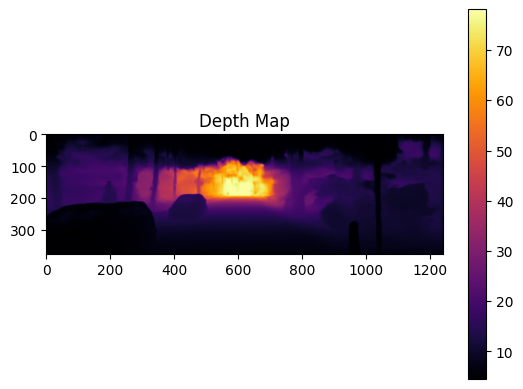

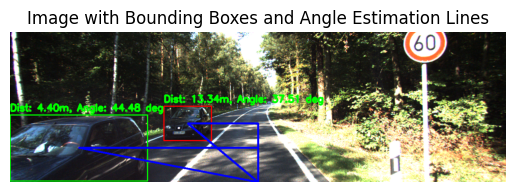

Calculated angles for bounding boxes: [44.48394475365524, 37.506451841233726]
Predicted distances for bounding boxes: [     4.3991      13.336]


In [ ]:
import torch
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import joblib
from infer import InferenceHelper
import xgboost as xgb
from PIL import ImageFont


# Assuming you have a YOLO class or function to load the model
model_yolo = YOLO("yolov8n.pt")

# Load the image
img_path = '/content/gdrive/MyDrive/images/000044.png'
img = Image.open(img_path)
draw = ImageDraw.Draw(img)  # Create a draw object to add bounding boxes to the image

# Perform YOLO inference
results = model_yolo(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# AdaBins
infer_helper = InferenceHelper(dataset='kitti')

# Predict depth of a single pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)
predicted_depth_np = predicted_depth[0][0]

# Display the depth map
plt.imshow(predicted_depth_np, cmap='inferno')
plt.colorbar()
plt.title('Depth Map')
plt.show()

def get_depth_features(depth_crop):
    # Be cautious with the depth values, if they are not integers, you may need a different approach to find the mode
    average_depth = np.mean(depth_crop)
    depth_variance = np.var(depth_crop)
    depth_median = np.median(depth_crop)
    depth_mode = np.bincount(depth_crop.astype(int).flatten()).argmax() if depth_crop.size else 0
    depth_range = np.ptp(depth_crop)
    depth_percentile_diff = np.percentile(depth_crop, 75) - np.percentile(depth_crop, 25)

    return average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff

# Load the trained Random Forest model
model_path = "/content/gdrive/MyDrive/AdaBins/xgboost_model_20features.pkl"
# Instead of joblib, you can directly use XGBoost's load_model function
xgb_model = xgb.XGBRegressor()
xgb_model = joblib.load(model_path)

# Filter out boxes for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

features_list = []
for box in boxes_xyxy:
    cropped_depth = predicted_depth_np[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff = get_depth_features(cropped_depth)

    BBox_left, BBox_top, BBox_right, BBox_bottom = box
    BBox_Width = BBox_right - BBox_left
    BBox_Height = BBox_bottom - BBox_top
    Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
    Aspect_Ratio = BBox_Width / BBox_Height
    Box_Area = BBox_Width * BBox_Height
    Box_Perimeter = 2 * (BBox_Width + BBox_Height)
    Centroid_x = (BBox_left + BBox_right) / 2
    Centroid_y = (BBox_top + BBox_bottom) / 2

    features = [
        BBox_left, BBox_top, BBox_right, BBox_bottom, average_depth,
        depth_variance, depth_median, depth_mode, depth_range,
        depth_percentile_diff, BBox_Width, BBox_Height, Diagonal,
        Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y
    ]
    features_list.append(features)

# Use the XGBoost model to predict the distance for each bounding box
predicted_distances = xgb_model.predict(np.array(features_list))

# Define the color for the lines
color = 'blue'  # PIL uses color names or tuples to define colors

# Get screen dimensions from the image
screen_center_x = img.width // 2
y_base = img.height  # Bottom of the image

# Function to calculate the angle
def calculate_angle(L1_distance, L1_pixel_length, L2_pixel_length):
    # Calculate real-world distance of L2 using pixel ratio
    L2_real_distance = (L2_pixel_length / L1_pixel_length) * L1_distance

    # Calculate the angle theta using arctan
    theta_rad = np.arctan(L2_real_distance / L1_distance)

    # Convert from radians to degrees
    theta_deg = np.degrees(theta_rad)

    return theta_deg


# Convert the PIL Image to a NumPy array for OpenCV
img_np = np.array(img)

# Convert RGB to BGR (OpenCV uses BGR by default)
img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

font_scale = 0.8  # OpenCV font scale
font_thickness = 4  # Thickness of the font
blue_color = (255, 0, 0)  # Blue color in BGR

angles = []
# Define threshold values
max_distance = 50.0  # cars within 5 meters
lower_degree = 0  # 0 degree
higher_degree = 40  # 40 degrees

# Define colors
green_color = (0, 255, 0)
red_color = (0, 0, 255)

for box, L1_distance in zip(boxes_xyxy, predicted_distances):
    BBox_left, BBox_top, BBox_right, BBox_bottom = box[:4]
    x_center_bbox = int((BBox_left + BBox_right) / 2)
    y_center_bbox = int((BBox_top + BBox_bottom) / 2)

    L1_pixel_length = np.sqrt((x_center_bbox - screen_center_x)**2 + (y_center_bbox - y_base)**2)
    L2_pixel_length = abs(x_center_bbox - screen_center_x)

    angle = calculate_angle(L1_distance, L1_pixel_length, L2_pixel_length)
    angles.append(angle)

    # Check if the detected car is within the distance and angle thresholds
    if L1_distance <= max_distance and lower_degree <= angle <= higher_degree:
        bbox_color = red_color
    else:
        bbox_color = green_color

    # Draw bounding box, lines, and text using cv2 with the determined color
    cv2.rectangle(img_np, (int(BBox_left), int(BBox_top)), (int(BBox_right), int(BBox_bottom)), bbox_color, 2)

    cv2.line(img_np, (screen_center_x, y_base), (x_center_bbox, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (x_center_bbox, y_center_bbox), (screen_center_x, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (screen_center_x, y_base), (screen_center_x, y_center_bbox), blue_color, font_thickness)

    display_text = f"Dist: {L1_distance:.2f}m, Angle: {angle:.2f} deg"
    text_x = int(BBox_left)
    text_y = int(BBox_top) - 10
    if text_y < 0:
        text_y = int(BBox_bottom) + 20
    cv2.putText(img_np, display_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), font_thickness)

# Display the image with bounding boxes and lines
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
plt.title('Image with Bounding Boxes and Angle Estimation Lines')
plt.axis('off')  # Hide the axes
plt.show()

# Print out the calculated angles
print("Calculated angles for bounding boxes:", angles)
print("Predicted distances for bounding boxes:", predicted_distances)






#@Random Forest Model Training with NO Depth Features


In [6]:
import pandas as pd

# Corrected code to load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/updated_output_with_features_NO_DEPTH.csv"
df = pd.read_csv(csv_file_path, delimiter=";") # Replace with the path to your CSV file

# Calculate the correlation between all attributes and the "distance" column
correlation = df.corr()["Distance"]

# Show the correlation values
print(correlation)


BBox_left        0.145413
BBox_top        -0.207892
BBox_right      -0.099815
BBox_bottom     -0.804850
Distance         1.000000
Width           -0.736849
Height          -0.805780
Diagonal        -0.779330
Aspect_Ratio    -0.028227
Box_Area        -0.648790
Box_Perimeter   -0.787161
Centroid_x       0.023439
Centroid_y      -0.770769
Name: Distance, dtype: float64


<ipython-input-6-c1efe8b3e491>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()["Distance"]


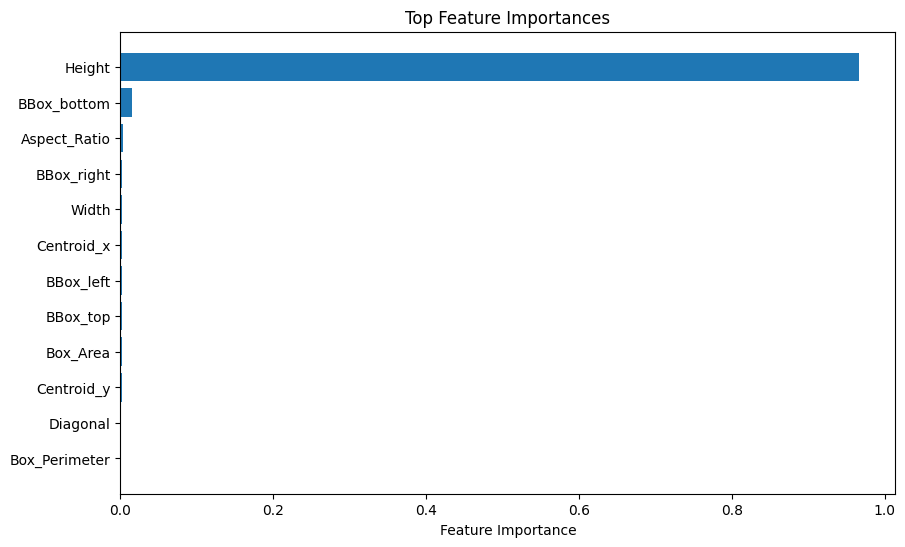

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Define input features (X) and target variable (y)
X = df.drop("Distance", axis=1).select_dtypes(include=['float64'])  # Input features (all float columns except "Distance")
y = df["Distance"]  # Target variable ("Distance")
# Split the data into training and testing sets

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the hyperparameters as needed
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for selecting the top N important features
top_n = 15  # Adjust the number of top features you want to keep

# Select the top N features
selected_features = importance_df['Feature'].head(top_n).values

# Create a new DataFrame with the selected features
X_selected = X[selected_features]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


RANDOM FOREST TRAINING ON WHOLE DATASET(INCLUDING DISTANCE MORE THAN 40M

In [14]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/updated_output_with_features_NO_DEPTH.csv"
df = pd.read_csv(csv_file_path, delimiter=";")

# Define input features (X) and target variable (y)
X = df[['BBox_left', 'BBox_top', 'BBox_right', 'BBox_bottom', 'Width','Height','Diagonal', 'Aspect_Ratio', 'Box_Area', 'Box_Perimeter', 'Centroid_x', 'Centroid_y' ]]
y = df["Distance"]  # Target variable ("distance")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest model with the best hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=931,
    max_depth=60,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=5,
    bootstrap=False,
    random_state=42  # To ensure reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate the Root Mean Squared Error (RMSE)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Calculate R-squared (R²)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.2f}")

# Save the trained model
model_save_path = "random_forest_model_14featuresHyper parameters12With no depth.pkl"
joblib.dump(rf_model, model_save_path)
print(f"Model saved to {model_save_path}")


Random Forest - Mean Absolute Error (MAE): 1.24
Random Forest - Mean Squared Error (MSE): 3.77
Random Forest - Root Mean Squared Error (RMSE): 1.94
Random Forest - R-squared (R²): 0.99
Model saved to random_forest_model_14featuresHyper parameters12With no depth.pkl


#@XGBOOST Model Training without Depth Features on WHOLE Dataset (Including DIstances more than 40m)

In [13]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/updated_output_with_features_NO_DEPTH.csv"
df = pd.read_csv(csv_file_path, delimiter=";")

# Define input features (X) and target variable (y)
X = df[['BBox_left', 'BBox_top', 'BBox_right', 'BBox_bottom', 'Width','Height','Diagonal', 'Aspect_Ratio', 'Box_Area', 'Box_Perimeter', 'Centroid_x', 'Centroid_y' ]]
y = df["Distance"]  # Target variable ("distance")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost model with the tuned hyperparameters
xgb_model = XGBRegressor(
    n_estimators=754,
    learning_rate=0.0935988726435254,
    max_depth=9,
    min_child_weight=5,
    subsample=0.828885796980134,
    colsample_bytree=0.8129822388917574,
    random_state=42
)



# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Calculate the Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate the Root Mean Squared Error (RMSE)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

# Calculate R-squared (R²)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"XGBoost - Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"XGBoost - R-squared (R²): {r2_xgb:.2f}")

# Save the trained model
model_save_path = "xgboost_model_TunedHyper_20features no depth.pkl"
joblib.dump(xgb_model, model_save_path)
print(f"Model saved to {model_save_path}")


XGBoost - Mean Absolute Error (MAE): 1.18
XGBoost - Mean Squared Error (MSE): 3.25
XGBoost - Root Mean Squared Error (RMSE): 1.80
XGBoost - R-squared (R²): 0.99
Model saved to xgboost_model_TunedHyper_20features no depth.pkl


#@Training XGBoost on Dataset without Depth Features and on a Dataset Filtered with only Distances less tha 40m

In [6]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [7]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/no records greater40.csv"
df = pd.read_csv(csv_file_path, delimiter=",")

# Define input features (X) and target variable (y)
X = df[['BBox_left', 'BBox_top', 'BBox_right', 'BBox_bottom', 'Width','Height','Diagonal', 'Aspect_Ratio', 'Box_Area', 'Box_Perimeter', 'Centroid_x', 'Centroid_y' ]]
y = df["Distance"]  # Target variable ("distance")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an XGBoost model with the tuned hyperparameters
xgb_model = XGBRegressor(
    n_estimators=754,
    learning_rate=0.0935988726435254,
    max_depth=9,
    min_child_weight=5,
    subsample=0.828885796980134,
    colsample_bytree=0.8129822388917574,
    random_state=42
)



# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Calculate the Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate the Root Mean Squared Error (RMSE)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

# Calculate R-squared (R²)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"XGBoost - Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"XGBoost - R-squared (R²): {r2_xgb:.2f}")

# Save the trained model
model_save_path = "xgboost_model_no_Greater_40"
joblib.dump(xgb_model, model_save_path)
print(f"Model saved to {model_save_path}")


XGBoost - Mean Absolute Error (MAE): 0.95
XGBoost - Mean Squared Error (MSE): 1.93
XGBoost - Root Mean Squared Error (RMSE): 1.39
XGBoost - R-squared (R²): 0.98
Model saved to xgboost_model_no_Greater_40


#@Training Random Forest Model on Dataset wihout Depth Map Features and Dataset Filtered with Distances Less than 40m

In [8]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file into a Pandas DataFrame
csv_file_path = "/content/gdrive/MyDrive/Random_Forest/no records greater40.csv"
df = pd.read_csv(csv_file_path, delimiter=",")

# Define input features (X) and target variable (y)
X = df[['BBox_left', 'BBox_top', 'BBox_right', 'BBox_bottom', 'Width','Height','Diagonal', 'Aspect_Ratio', 'Box_Area', 'Box_Perimeter', 'Centroid_x', 'Centroid_y' ]]
y = df["Distance"]  # Target variable ("distance")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest model with the best hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=931,
    max_depth=60,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=5,
    bootstrap=False,
    random_state=42  # To ensure reproducibility
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate the Root Mean Squared Error (RMSE)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Calculate R-squared (R²)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.2f}")

# Save the trained model
model_save_path = "random_forest_no_Greater_40.pkl"
joblib.dump(rf_model, model_save_path)
print(f"Model saved to {model_save_path}")


Random Forest - Mean Absolute Error (MAE): 0.97
Random Forest - Mean Squared Error (MSE): 2.03
Random Forest - Root Mean Squared Error (RMSE): 1.42
Random Forest - R-squared (R²): 0.98
Model saved to random_forest_no_Greater_40.pkl
